In [30]:
import pandas as pd

try:
    file_path = r"File_Path"
    df = pd.read_excel(file_path)
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: File not found. Please ensure the file 'File_Path' is in the current directory or provide the correct path.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Category,PT,FE,AIGL,Ave_PA,Ave_CT,Ave_PI,Mean_PA,Mean_AT,Mean_R,...,PC1,PC2,PC3,PC4,Mean_BC,Mean_SL,Mean_TS,Mean_PD,Mean_WP,Mean_PC
0,1,1,1,1,5.3,4.3,5.333333,5.00,5.666667,5.333333,...,4,4,6,6,4.00,4.333333,4.666667,5.75,5.25,4.666667
1,1,1,1,1,5.4,4.2,5.583333,5.00,6.333333,5.000000,...,6,4,6,6,4.00,4.000000,4.666667,5.50,5.75,5.333333
2,1,1,1,1,4.9,4.7,4.583333,4.75,5.333333,4.666667,...,5,4,3,2,4.75,4.000000,5.333333,5.25,5.00,4.000000
3,1,1,1,1,4.4,3.5,3.083333,4.00,5.000000,4.333333,...,5,4,1,2,3.00,4.000000,3.666667,2.25,4.00,3.333333
4,1,1,1,1,5.3,4.6,5.583333,5.25,6.000000,4.666667,...,6,6,6,5,4.50,4.333333,5.000000,5.75,5.25,6.000000


(205, 48)


In [31]:
# Display the first few rows of the DataFrame
display(df.head())

# Check data types
print(df.dtypes)

# Get the shape of the DataFrame
print("\nDataFrame Shape:", df.shape)

# Check for missing values in specified columns
print("\nMissing Values:")
print(df[['PA1', 'PA2', 'PA3', 'PA4']].isnull().sum())

# Analyze the two 'PA3' columns for potential duplication
print("\nAnalysis of 'PA3' columns:")
if 'PA3' in df.columns:
    # Assuming there's only one 'PA3', check if it is the same as PA4
    print("Comparing 'PA3' and 'PA4':")
    print((df['PA3'] == df['PA4']).value_counts())
    # If there are two 'PA3' columns (unlikely but possible)
else:
    print("There is no 'PA3' column in the DataFrame.")

,Category,PT,FE,AIGL,Ave_PA,Ave_CT,Ave_PI,Mean_PA,Mean_AT,Mean_R,...,PC1,PC2,PC3,PC4,Mean_BC,Mean_SL,Mean_TS,Mean_PD,Mean_WP,Mean_PC
0,1,1,1,1,5.3,4.3,5.333333,5.00,5.666667,5.333333,...,4,4,6,6,4.00,4.333333,4.666667,5.75,5.25,4.666667
1,1,1,1,1,5.4,4.2,5.583333,5.00,6.333333,5.000000,...,6,4,6,6,4.00,4.000000,4.666667,5.50,5.75,5.333333
2,1,1,1,1,4.9,4.7,4.583333,4.75,5.333333,4.666667,...,5,4,3,2,4.75,4.000000,5.333333,5.25,5.00,4.000000
3,1,1,1,1,4.4,3.5,3.083333,4.00,5.000000,4.333333,...,5,4,1,2,3.00,4.000000,3.666667,2.25,4.00,3.333333
4,1,1,1,1,5.3,4.6,5.583333,5.25,6.000000,4.666667,...,6,6,6,5,4.50,4.333333,5.000000,5.75,5.25,6.000000


Category      int64
PT            int64
FE            int64
AIGL          int64
Ave_PA      float64
Ave_CT      float64
Ave_PI      float64
Mean_PA     float64
Mean_AT     float64
Mean_R      float64
PA1           int64
PA2           int64
PA3           int64
PA4           int64
AT1           int64
AT2           int64
AT3           int64
R1            int64
R2            int64
R3            int64
SL1           int64
SL2           int64
SL3           int64
TS1           int64
TS2           int64
TS3           int64
BC1           int64
BC2           int64
BC3           int64
BC4           int64
WP1           int64
WP2           int64
WP3           int64
WP4           int64
PD1           int64
PD2           int64
PD3           int64
PD4           int64
PC1           int64
PC2           int64
PC3           int64
PC4           int64
Mean_BC     float64
Mean_SL     float64
Mean_TS     float64
Mean_PD     float64
Mean_WP     float64
Mean_PC     float64
dtype: object

DataFrame Shape: (205, 48

In [32]:
print(df.columns.tolist())

['Category', 'PT', 'FE', 'AIGL', 'Ave_PA', 'Ave_CT', 'Ave_PI', 'Mean_PA', 'Mean_AT', 'Mean_R', 'PA1', 'PA2', 'PA3', 'PA4', 'AT1', 'AT2', 'AT3', 'R1', 'R2', 'R3', 'SL1', 'SL2', 'SL3', 'TS1', 'TS2', 'TS3', 'BC1', 'BC2', 'BC3', 'BC4', 'WP1', 'WP2', 'WP3', 'WP4', 'PD1', 'PD2', 'PD3', 'PD4', 'PC1', 'PC2', 'PC3', 'PC4', 'Mean_BC', 'Mean_SL', 'Mean_TS', 'Mean_PD', 'Mean_WP', 'Mean_PC']


In [33]:
from scipy.stats import pearsonr

# Define indicator and items
indikator_items = {
    'Perceived authenticity': ['PA1', 'PA2', 'PA3', 'PA4'],
    'Attitude toward virtual item': ['AT1', 'AT2', 'AT3'],
    'Reputation': ['R1', 'R2', 'R3'],
    'Store loyalty': ['SL1', 'SL2', 'SL3'],
    'Trust Stance': ['TS1', 'TS2', 'TS3'],
    'Brand credibility': ['BC1', 'BC2', 'BC3', 'BC4'],
    'Willingness-to-pay': ['WP1', 'WP2', 'WP3', 'WP4'],
    'Purchase decision': ['PD1', 'PD2', 'PD3', 'PD4'],
    'Purchase convenience': ['PC1', 'PC2', 'PC3', 'PC4']
}

# r-table for n = 205 and α = 0.05
r_tabel = 0.1371

# Return to the list
hasil_validitas = []

for indikator, items in indikator_items.items():
    # Count the total indicator and item
    df[f'total_{indikator}'] = df[items].sum(axis=1)

    for item in items:
        df[f'total_lain'] = df[f'total_{indikator}'] - df[item]
        r, p = pearsonr(df[item], df['total_lain'])

        hasil_validitas.append({
            'Indikator': indikator,
            'Item': item,
            'r-hitung': round(r, 4),
            'Valid': 'Ya' if r >= r_tabel else 'Tidak'
        })

tabel_validitas = pd.DataFrame(hasil_validitas)

# Display the table of validity analysis
tabel_validitas

,Indikator,Item,r-hitung,Valid
0,Perceived authenticity,PA1,0.4533,Ya
1,Perceived authenticity,PA2,0.4842,Ya
2,Perceived authenticity,PA3,0.5125,Ya
3,Perceived authenticity,PA4,0.4600,Ya
4,Attitude toward virtual item,AT1,0.4695,Ya
5,Attitude toward virtual item,AT2,0.4058,Ya
6,Attitude toward virtual item,AT3,0.5410,Ya
7,Reputation,R1,0.5235,Ya
8,Reputation,R2,0.6013,Ya
9,Reputation,R3,0.6090,Ya


In [34]:
import numpy as np

# Indicator and items
indikator_items = {
    'Perceived authenticity': ['PA1', 'PA2', 'PA3', 'PA4'],
    'Attitude toward virtual item': ['AT1', 'AT2', 'AT3'],
    'Reputation': ['R1', 'R2', 'R3'],
    'Store loyalty': ['SL1', 'SL2', 'SL3'],
    'Trust Stance': ['TS1', 'TS2', 'TS3'],
    'Brand credibility': ['BC1', 'BC2', 'BC3', 'BC4'],
    'Willingness-to-pay': ['WP1', 'WP2', 'WP3', 'WP4'],
    'Purchase decision': ['PD1', 'PD2', 'PD3', 'PD4'],
    'Purchase convenience': ['PC1', 'PC2', 'PC3', 'PC4']
}

# Cronbach's Alpha function
def cronbach_alpha(items_scores):
    items_scores = np.array(items_scores)
    item_variances = items_scores.var(axis=0, ddof=1)
    total_score_variance = items_scores.sum(axis=1).var(ddof=1)
    n_items = items_scores.shape[1]
    alpha = (n_items / (n_items - 1)) * (1 - item_variances.sum() / total_score_variance)
    return alpha

# Return to the list
hasil_reliabilitas = []

for indikator, items in indikator_items.items():
    if all(item in df.columns for item in items):
        skor_item = df[items]
        alpha = cronbach_alpha(skor_item)
        hasil_reliabilitas.append({
            'Indikator': indikator,
            'Item': ', '.join(items),
            'Cronbach\'s Alpha': round(alpha, 3),
            'Reliabel': 'Ya' if alpha >= 0.6 else 'Tidak'
        })

tabel_reliabilitas = pd.DataFrame(hasil_reliabilitas)

# Display the table of reliability analysis

In [35]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataframe.
file_path = r"File_Path"
try:
    # Attempt to read with default UTF-8 encoding first
    try:
        df = pd.read_excel(file_path)
    except UnicodeDecodeError:
        # If UTF-8 fails, try 'latin1' or 'ISO-8859-1'
        print("UTF-8 decoding failed, trying 'latin1' encoding...")
        df = pd.read_csv(file_path, encoding='latin1')
    except Exception as e:
        print(f"Error reading CSV with multiple encodings: {e}")
        raise # Re-raise other potential errors

    print("--- Initial Data Info ---")
    print("First 5 rows:")
    print(df.head())
    print(f"\nShape: {df.shape}")
    # print("\nInfo:")
    # df.info() # Keep concise for this run

    # Define variable names
    independent_var = 'AIGL'
    mediator_var = 'Ave_PA'
    dependent_var_1 = 'Ave_CT'
    dependent_var_2 = 'Ave_PI'
    moderator_1 = 'PT'
    moderator_2 = 'FE'

    # --- Data Preparation ---
    print("\n--- Data Preparation ---")
    # Check for required columns
    required_cols = [independent_var, mediator_var, dependent_var_1, dependent_var_2, moderator_1, moderator_2]
    missing_cols = [col for col in required_cols if col not in df.columns]

    if missing_cols:
        print(f"Error: Missing required columns: {missing_cols}")
        print(f"Available columns: {df.columns.tolist()}")
        raise ValueError("Missing required columns") # Stop execution

    # Convert relevant columns to numeric, coercing errors
    for col in required_cols:
      df[col] = pd.to_numeric(df[col], errors='coerce')

    # Handle missing values (listwise deletion)
    initial_rows = df.shape[0]
    df.dropna(subset=required_cols, inplace=True)
    rows_after_na = df.shape[0]
    if rows_after_na < initial_rows:
        print(f"Removed {initial_rows - rows_after_na} rows with missing values in required columns.")
    if rows_after_na == 0:
        raise ValueError("No valid data remaining after removing missing values.")

    print(f"Data shape after cleaning: {df.shape}")

    # Standardize variables to get Beta coefficients
    print("Standardizing variables...")
    scaler = StandardScaler()
    # Select only the columns to be standardized
    cols_to_standardize = required_cols
    df_std = df.copy() # Work on a copy
    # Check for zero variance before scaling
    for col in cols_to_standardize:
        if df_std[col].std() == 0:
            print(f"Warning: Column '{col}' has zero standard deviation and cannot be standardized. Removing it from standardization.")
        else:
            # Apply scaling only if std dev is not zero
             df_std[col+'_std'] = scaler.fit_transform(df_std[[col]])


    # --- Model Testing with Standardized Variables ---
    print("\n--- Hypothesis Testing (Focus on Beta & p-value) ---")

    # Define standardized variable names for formulas
    iv_std = independent_var + '_std'
    med_std = mediator_var + '_std'
    dv1_std = dependent_var_1 + '_std'
    dv2_std = dependent_var_2 + '_std'
    mod1_std = moderator_1 + '_std'
    mod2_std = moderator_2 + '_std'

    # Check if all standardized columns were created (might fail if std dev was zero)
    required_std_cols = [iv_std, med_std, dv1_std, dv2_std, mod1_std, mod2_std]
    missing_std_cols = [col for col in required_std_cols if col not in df_std.columns]
    if missing_std_cols:
        print(f"Error: Could not create standardized columns (possibly due to zero variance): {missing_std_cols}")
        raise ValueError("Standardization failed for some columns.")

    results = {}

    # Model 1: Testing H2a, H3, H4 (Ave_PA ~ AIGL * PT + AIGL * FE)
    print("\n--- Model 1: Testing H2a, H3, H4 ---")
    model1_formula_std = f"{med_std} ~ {iv_std} * {mod1_std} + {iv_std} * {mod2_std}"
    try:
        model1_std = smf.ols(formula=model1_formula_std, data=df_std).fit()
        print(model1_std.summary())

        # Extract results for hypotheses
        results['H2a'] = {'Beta': model1_std.params[iv_std], 'p_value': model1_std.pvalues[iv_std]}
        results['H3'] = {'Beta': model1_std.params[f'{iv_std}:{mod1_std}'], 'p_value': model1_std.pvalues[f'{iv_std}:{mod1_std}']}
        results['H4'] = {'Beta': model1_std.params[f'{iv_std}:{mod2_std}'], 'p_value': model1_std.pvalues[f'{iv_std}:{mod2_std}']}

    except Exception as e:
        print(f"Error fitting Model 1 (Standardized): {e}")
        results['H2a'] = results['H3'] = results['H4'] = {'Beta': np.nan, 'p_value': np.nan, 'Error': str(e)}


    # Model 2: Testing H1 (Direct Effect) & H2b (Ave_CT ~ AIGL + Ave_PA)
    print(f"\n--- Model 2: Testing H1 (Direct Effect) & H2b ---")
    model2_formula_std = f"{dv1_std} ~ {iv_std} + {med_std}"
    try:
        model2_std = smf.ols(formula=model2_formula_std, data=df_std).fit()
        print(model2_std.summary())

        # Extract results
        # Note: H1 direct effect is the effect of AIGL controlling for Ave_PA
        results['H1_direct'] = {'Beta': model2_std.params[iv_std], 'p_value': model2_std.pvalues[iv_std]}
        results['H2b'] = {'Beta': model2_std.params[med_std], 'p_value': model2_std.pvalues[med_std]}

    except Exception as e:
        print(f"Error fitting Model 2 (Standardized): {e}")
        results['H1_direct'] = results['H2b'] = {'Beta': np.nan, 'p_value': np.nan, 'Error': str(e)}


    # Model 3: Testing H5 (Ave_PI ~ Ave_CT)
    print(f"\n--- Model 3: Testing H5 ---")
    model3_formula_std = f"{dv2_std} ~ {dv1_std}"
    try:
        model3_std = smf.ols(formula=model3_formula_std, data=df_std).fit()
        print(model3_std.summary())

        # Extract results
        results['H5'] = {'Beta': model3_std.params[dv1_std], 'p_value': model3_std.pvalues[dv1_std]}

    except Exception as e:
        print(f"Error fitting Model 3 (Standardized): {e}")
        results['H5'] = {'Beta': np.nan, 'p_value': np.nan, 'Error': str(e)}


    # Total Effect Model: Testing H1 (Total Effect) (Ave_CT ~ AIGL)
    print(f"\n--- Total Effect Model: Testing H1 (Total Effect) ---")
    total_effect_formula_std = f"{dv1_std} ~ {iv_std}"
    try:
        total_effect_model_std = smf.ols(formula=total_effect_formula_std, data=df_std).fit()
        print(total_effect_model_std.summary())

        # Extract results
        results['H1_total'] = {'Beta': total_effect_model_std.params[iv_std], 'p_value': total_effect_model_std.pvalues[iv_std]}

    except Exception as e:
        print(f"Error fitting Total Effect Model (Standardized): {e}")
        results['H1_total'] = {'Beta': np.nan, 'p_value': np.nan, 'Error': str(e)}


    # --- Summary of Results (Beta & p-value) ---
    print("\n\n--- Summary of Hypothesis Tests (Beta & p-value) ---")
    print("------------------------------------------------------")
    alpha = 0.05 # Significance level

    for hypo, res in results.items():
        if 'Error' in res:
            print(f"{hypo}: Error during analysis - {res['Error']}")
            continue

        beta = res['Beta']
        p_value = res['p_value']
        significant = p_value < alpha
        supported = "Supported" if significant else "Not Supported"

        # Clarify H1 total vs direct
        hypo_desc = hypo
        if hypo == 'H1_total':
            hypo_desc = "H1 (Total Effect: AIGL -> Ave_CT)"
        elif hypo == 'H1_direct':
            hypo_desc = "H1 (Direct Effect: AIGL -> Ave_CT | controlling Ave_PA)"
        elif hypo == 'H2a':
            hypo_desc = "H2a (AIGL -> Ave_PA)"
        elif hypo == 'H2b':
            hypo_desc = "H2b (Ave_PA -> Ave_CT)"
        elif hypo == 'H3':
             hypo_desc = "H3 (Moderation: PT on AIGL -> Ave_PA)"
        elif hypo == 'H4':
             hypo_desc = "H4 (Moderation: FE on AIGL -> Ave_PA)"
        elif hypo == 'H5':
            hypo_desc = "H5 (Ave_CT -> Ave_PI)"

        print(f"{hypo_desc}:")
        print(f"  Beta (Standardized Coefficient): {beta:.4f}")
        print(f"  p-value: {p_value:.4f}")
        print(f"  Significant (at alpha={alpha}): {significant}")
        print(f"  Conclusion: {supported}")
        print("------------------------------------------------------")


except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty.")
except ValueError as ve:
    print(f"Data Error: {ve}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")



--- Initial Data Info ---
First 5 rows:
   Category  PT  FE  AIGL  Ave_PA  Ave_CT    Ave_PI  Mean_PA   Mean_AT  \
0         1   1   1     1     5.3     4.3  5.333333     5.00  5.666667   
1         1   1   1     1     5.4     4.2  5.583333     5.00  6.333333   
2         1   1   1     1     4.9     4.7  4.583333     4.75  5.333333   
3         1   1   1     1     4.4     3.5  3.083333     4.00  5.000000   
4         1   1   1     1     5.3     4.6  5.583333     5.25  6.000000   

     Mean_R  ...  PC1  PC2  PC3  PC4  Mean_BC   Mean_SL   Mean_TS  Mean_PD  \
0  5.333333  ...    4    4    6    6     4.00  4.333333  4.666667     5.75   
1  5.000000  ...    6    4    6    6     4.00  4.000000  4.666667     5.50   
2  4.666667  ...    5    4    3    2     4.75  4.000000  5.333333     5.25   
3  4.333333  ...    5    4    1    2     3.00  4.000000  3.666667     2.25   
4  4.666667  ...    6    6    6    5     4.50  4.333333  5.000000     5.75   

   Mean_WP   Mean_PC  
0     5.25  4.666667  


In [36]:
from scipy.stats import mannwhitneyu

AIGL_Low = df[df['AIGL'] == 1]['Ave_PA']
AIGL_High = df[df['AIGL'] == 2]['Ave_PA']

# Mann-Whitney U Test
statistic, p_value = mannwhitneyu(AIGL_Low, AIGL_High)

print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan antara AIGL Low dengan AIGL High terhadap Perception on Authenticity.")
else:
    print("Tidak terdapat perbedaan signifikan antara kelompok AIGL Low dengan AIGL High terhadap Perception on Authenticity.")

Mann-Whitney U statistic: 1900.0
P-value: 2.6493212822568533e-15
Terdapat perbedaan signifikan antara AIGL Low dengan AIGL High terhadap Perception on Authenticity.


In [37]:
from scipy.stats import mannwhitneyu

AIGL_Low = df[df['AIGL'] == 1]['Ave_CT']
AIGL_High = df[df['AIGL'] == 2]['Ave_CT']

# Mann-Whitney U Test
statistic, p_value = mannwhitneyu(AIGL_Low, AIGL_High)

print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan antara AIGL Low dengan AIGL High terhadap Consumer Trust.")
else:
    print("Tidak terdapat perbedaan signifikan antara kelompok AIGL Low dengan AIGL High terhadap Consumer Trust.")

Mann-Whitney U statistic: 2685.0
P-value: 1.368199388850168e-09
Terdapat perbedaan signifikan antara AIGL Low dengan AIGL High terhadap Consumer Trust.


In [38]:
from scipy.stats import mannwhitneyu

AIGL_Low = df[df['AIGL'] == 1]['Ave_PI']
AIGL_High = df[df['AIGL'] == 2]['Ave_PI']

# Mann-Whitney U Test
statistic, p_value = mannwhitneyu(AIGL_Low, AIGL_High)

print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan antara AIGL Low dengan AIGL High terhadap Purchase Intention.")
else:
    print("Tidak terdapat perbedaan signifikan antara kelompok AIGL Low dengan AIGL High terhadap Purchase Intention.")

Mann-Whitney U statistic: 3498.5
P-value: 3.526937700457154e-05
Terdapat perbedaan signifikan antara AIGL Low dengan AIGL High terhadap Purchase Intention.


In [39]:
from scipy.stats import mannwhitneyu

PT_Pinterest = df[df['PT'] == 1]['Ave_PA']
PT_TikTok = df[df['PT'] == 2]['Ave_PA']

# Mann-Whitney U Test
statistic, p_value = mannwhitneyu(PT_Pinterest, PT_TikTok)

print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan antara Pinterest dan TikTok terhadap Perception on Authenticity.")
else:
    print("Tidak terdapat perbedaan signifikan antara kelompok Pinterest dan TikTok terhadap Perception on Authenticity.")

Mann-Whitney U statistic: 2799.0
P-value: 7.225197975989534e-09
Terdapat perbedaan signifikan antara Pinterest dan TikTok terhadap Perception on Authenticity.


In [40]:
from scipy.stats import mannwhitneyu

PT_Pinterest = df[df['PT'] == 1]['Ave_CT']
PT_TikTok = df[df['PT'] == 2]['Ave_CT']

# Mann-Whitney U Test
statistic, p_value = mannwhitneyu(PT_Pinterest, PT_TikTok)

print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan antara Pinterest dan TikTok terhadap Consumer Trust.")
else:
    print("Tidak terdapat perbedaan signifikan antara kelompok Pinterest dan TikTok terhadap Consumer Trust.")

Mann-Whitney U statistic: 2376.5
P-value: 1.1408877343742458e-11
Terdapat perbedaan signifikan antara Pinterest dan TikTok terhadap Consumer Trust.


In [41]:
from scipy.stats import mannwhitneyu

PT_Pinterest = df[df['PT'] == 1]['Ave_PI']
PT_TikTok = df[df['PT'] == 2]['Ave_PI']

# Mann-Whitney U Test
statistic, p_value = mannwhitneyu(PT_Pinterest, PT_TikTok)

print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan antara Pinterest dan TikTok terhadap Purchase Intention.")
else:
    print("Tidak terdapat perbedaan signifikan antara kelompok Pinterest dan TikTok terhadap Purchase Intention.")

Mann-Whitney U statistic: 2231.5
P-value: 1.032195349960316e-12
Terdapat perbedaan signifikan antara Pinterest dan TikTok terhadap Purchase Intention.


In [42]:
from scipy.stats import mannwhitneyu

FE_Smiling = df[df['FE'] == 1]['Ave_PA']
FE_Nonsmilling = df[df['FE'] == 2]['Ave_PA']

# Mann-Whitney U Test
statistic, p_value = mannwhitneyu(FE_Smiling, FE_Nonsmilling)

print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan antara Face Expression Smiling dan Face Expression Non-smilling terhadap Perception on Authenticity.")
else:
    print("Tidak terdapat perbedaan signifikan antara kelompok Face Expression Smiling dan Face Expression Non-smilling terhadap Perception on Authenticity.")

Mann-Whitney U statistic: 5248.5
P-value: 0.9981173824626062
Tidak terdapat perbedaan signifikan antara kelompok Face Expression Smiling dan Face Expression Non-smilling terhadap Perception on Authenticity.


In [43]:
from scipy.stats import mannwhitneyu

FE_Smiling = df[df['FE'] == 1]['Ave_CT']
FE_Nonsmilling = df[df['FE'] == 2]['Ave_CT']

# Mann-Whitney U Test
statistic, p_value = mannwhitneyu(FE_Smiling, FE_Nonsmilling)

print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan antara Face Expression Smiling dan Face Expression Non-smilling terhadap Consumer Trust.")
else:
    print("Tidak terdapat perbedaan signifikan antara kelompok Face Expression Smiling dan Face Expression Non-smilling terhadap Consumer Trust.")

Mann-Whitney U statistic: 4878.5
P-value: 0.38100276571429903
Tidak terdapat perbedaan signifikan antara kelompok Face Expression Smiling dan Face Expression Non-smilling terhadap Consumer Trust.


In [44]:
from scipy.stats import mannwhitneyu

FE_Smiling = df[df['FE'] == 1]['Ave_PI']
FE_Nonsmilling = df[df['FE'] == 2]['Ave_PI']

# Mann-Whitney U Test
statistic, p_value = mannwhitneyu(FE_Smiling, FE_Nonsmilling)

print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan antara Face Expression Smiling dan Face Expression Non-smilling terhadap Purchase Intention.")
else:
    print("Tidak terdapat perbedaan signifikan antara kelompok Face Expression Smiling dan Face Expression Non-smilling terhadap Purchase Intention.")

Mann-Whitney U statistic: 5198.5
P-value: 0.9041939433239738
Tidak terdapat perbedaan signifikan antara kelompok Face Expression Smiling dan Face Expression Non-smilling terhadap Purchase Intention.


In [45]:
from scipy.stats import ttest_ind

variabels = ['Ave_PA', 'Ave_CT', 'Ave_PI']

# T-test
for var in variabels:
    AIGL_Low = df[df['AIGL'] == 1][var]
    AIGL_High = df[df['AIGL'] == 2][var]

    # Independent t-test
    t_stat, p_val = ttest_ind(AIGL_Low, AIGL_High, equal_var=False)

    print(f"=== Uji t untuk variabel {var} ===")
    print(f"t-statistik: {t_stat:.4f}")
    print(f"p-value: {p_val:.4f}")

    if p_val < 0.05:
        print("=> Terdapat perbedaan signifikan antara kelompok AIGL_Low dan AIGL_High\n")
    else:
        print("=> Tidak terdapat perbedaan signifikan antara kelompok AIGL_Low dan AIGL_High\n")

=== Uji t untuk variabel Ave_PA ===
t-statistik: -7.0048
p-value: 0.0000
=> Terdapat perbedaan signifikan antara kelompok AIGL_Low dan AIGL_High

=== Uji t untuk variabel Ave_CT ===
t-statistik: -6.0639
p-value: 0.0000
=> Terdapat perbedaan signifikan antara kelompok AIGL_Low dan AIGL_High

=== Uji t untuk variabel Ave_PI ===
t-statistik: -3.3813
p-value: 0.0009
=> Terdapat perbedaan signifikan antara kelompok AIGL_Low dan AIGL_High



In [46]:
from scipy.stats import ttest_ind

variabels = ['Ave_PA', 'Ave_CT', 'Ave_PI']

# T-test
for var in variabels:
    PT_Pinterest = df[df['PT'] == 1][var]
    PT_TikTok = df[df['PT'] == 2][var]

    # Independent t-test
    t_stat, p_val = ttest_ind(PT_Pinterest, PT_TikTok, equal_var=False)

    print(f"=== Uji t untuk variabel {var} ===")
    print(f"t-statistik: {t_stat:.4f}")
    print(f"p-value: {p_val:.4f}")

    if p_val < 0.05:
        print("=> Terdapat perbedaan signifikan antara kelompok PT_Pinterest dan PT_TikTok\n")
    else:
        print("=> Tidak terdapat perbedaan signifikan antara kelompok PT_Pinterest dan PT_TikTok\n")

=== Uji t untuk variabel Ave_PA ===
t-statistik: -6.1728
p-value: 0.0000
=> Terdapat perbedaan signifikan antara kelompok PT_Pinterest dan PT_TikTok

=== Uji t untuk variabel Ave_CT ===
t-statistik: -6.3912
p-value: 0.0000
=> Terdapat perbedaan signifikan antara kelompok PT_Pinterest dan PT_TikTok

=== Uji t untuk variabel Ave_PI ===
t-statistik: -5.9171
p-value: 0.0000
=> Terdapat perbedaan signifikan antara kelompok PT_Pinterest dan PT_TikTok



In [47]:
from scipy.stats import ttest_ind

variabels = ['Ave_PA', 'Ave_CT', 'Ave_PI']

# T-test
for var in variabels:
    FE_Smiling = df[df['FE'] == 1][var]
    FE_NonSmilling = df[df['FE'] == 2][var]

    # Independent t-test
    t_stat, p_val = ttest_ind(FE_Smiling, FE_NonSmilling, equal_var=False)

    print(f"=== Uji t untuk variabel {var} ===")
    print(f"t-statistik: {t_stat:.4f}")
    print(f"p-value: {p_val:.4f}")

    if p_val < 0.05:
        print("=> Terdapat perbedaan signifikan antara kelompok FE_Smiling dan FE_NonSmilling\n")
    else:
        print("=> Tidak terdapat perbedaan signifikan antara kelompok FE_Smiling dan FE_NonSmilling\n")

=== Uji t untuk variabel Ave_PA ===
t-statistik: -1.0784
p-value: 0.2823
=> Tidak terdapat perbedaan signifikan antara kelompok FE_Smiling dan FE_NonSmilling

=== Uji t untuk variabel Ave_CT ===
t-statistik: -2.3200
p-value: 0.0216
=> Terdapat perbedaan signifikan antara kelompok FE_Smiling dan FE_NonSmilling

=== Uji t untuk variabel Ave_PI ===
t-statistik: -1.4189
p-value: 0.1579
=> Tidak terdapat perbedaan signifikan antara kelompok FE_Smiling dan FE_NonSmilling



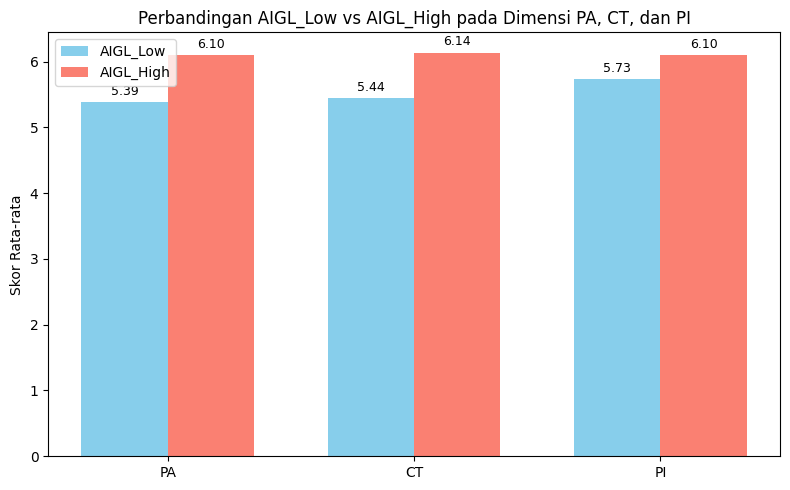

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['PA', 'CT', 'PI']
AIGL_Low = [5.387, 5.441, 5.730]
AIGL_High = [6.100, 6.138, 6.100]

x = np.arange(len(labels))
width = 0.35 

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, AIGL_Low, width, label='AIGL_Low', color='skyblue')
bars2 = ax.bar(x + width/2, AIGL_High, width, label='AIGL_High', color='salmon')

# Labels and titles
ax.set_ylabel('Skor Rata-rata')
ax.set_title('Perbandingan AIGL_Low vs AIGL_High pada Dimensi PA, CT, dan PI')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


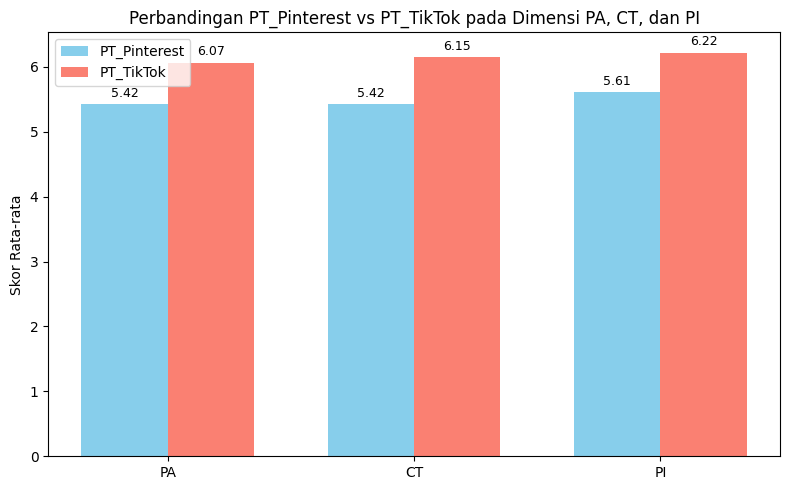

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['PA', 'CT', 'PI']
PT_Pinterest = [5.422, 5.425, 5.606]
PT_TikTok = [6.066, 6.153, 6.220]

x = np.arange(len(labels))
width = 0.35 

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, PT_Pinterest, width, label='PT_Pinterest', color='skyblue')
bars2 = ax.bar(x + width/2, PT_TikTok, width, label='PT_TikTok', color='salmon')

# Labels and titles
ax.set_ylabel('Skor Rata-rata')
ax.set_title('Perbandingan PT_Pinterest vs PT_TikTok pada Dimensi PA, CT, dan PI')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


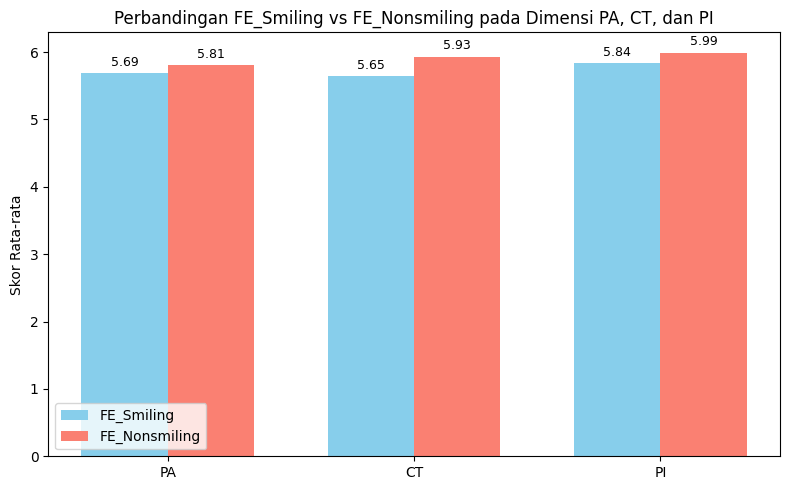

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['PA', 'CT', 'PI']
FE_Smiling = [5.686, 5.647, 5.838]
FE_Nonsmiling = [5.809, 5.934, 5.994]

x = np.arange(len(labels))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, FE_Smiling, width, label='FE_Smiling', color='skyblue')
bars2 = ax.bar(x + width/2, FE_Nonsmiling, width, label='FE_Nonsmiling', color='salmon')

# Labels and titles
ax.set_ylabel('Skor Rata-rata')
ax.set_title('Perbandingan FE_Smiling vs FE_Nonsmiling pada Dimensi PA, CT, dan PI')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [51]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Load data
data = pd.read_excel("File_Path")

# Independent variable
X = df[['Ave_PA', 'Ave_CT', 'AIGL']]

# Constant for the intercept
X_const = add_constant(X)

# VIF and Tolerance
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]
vif_data["Tolerance"] = 1 / vif_data["VIF"]

print(vif_data)


  Variable       VIF  Tolerance
0   Ave_PA  3.471325   0.288074
1   Ave_CT  3.305227   0.302551
2     AIGL  1.246568   0.802202


## Uji ANOVA

In [52]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = pd.read_excel("File_Path")


# ANOVA Test 
model = ols('Ave_PA ~ C(Category)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                sum_sq     df          F        PR(>F)
C(Category)  59.709382    7.0  22.923985  1.367717e-22
Residual     73.302813  197.0        NaN           NaN


In [53]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = pd.read_excel("File_Path")

# ANOVA Test 
model = ols('Ave_CT ~ C(Category)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                sum_sq     df          F        PR(>F)
C(Category)  87.835899    7.0  34.163254  6.905360e-31
Residual     72.357076  197.0        NaN           NaN


In [54]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = pd.read_excel("File_Path")

# ANOVA Test 
model = ols('Ave_PI ~ C(Category)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                sum_sq     df          F        PR(>F)
C(Category)  33.856008    7.0  10.087238  9.140872e-11
Residual     94.456458  197.0        NaN           NaN


## Tukey's HSD

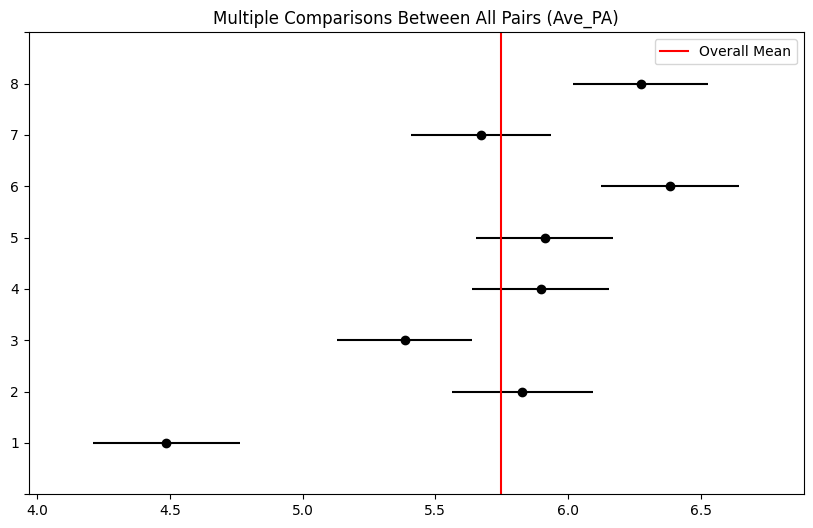

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2    1.341    0.0  0.8011   1.881   True
     1      3   0.8982    0.0  0.3679  1.4285   True
     1      4   1.4092    0.0  0.8742  1.9442   True
     1      5   1.4246    0.0  0.8896  1.9596   True
     1      6   1.8977    0.0  1.3627  2.4326   True
     1      7    1.185    0.0  0.6451   1.725   True
     1      8   1.7871    0.0  1.2568  2.3174   True
     2      3  -0.4428 0.1566 -0.9615  0.0759  False
     2      4   0.0682 0.9999 -0.4553  0.5917  False
     2      5   0.0835 0.9997   -0.44   0.607  False
     2      6   0.5566 0.0283  0.0331  1.0801   True
     2      7   -0.156 0.9854 -0.6846  0.3726  False
     2      8   0.4461 0.1499 -0.0727  0.9648  False
     3      4    0.511 0.0522 -0.0026  1.0245  False
     3      5   0.5264 0.0402  0.0128  1.0399   True
     3      6   0.9994    0.0  0.4859   1.513 

In [55]:
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey Analysis
tukey = pairwise_tukeyhsd(endog=data['Ave_PA'], groups=data['Category'], alpha=0.05)

# Plot Tukey + mean vertical line
fig = tukey.plot_simultaneous()
overall_mean = data['Ave_PA'].mean()
plt.axvline(x=overall_mean, color='red', label='Overall Mean')
plt.title('Multiple Comparisons Between All Pairs (Ave_PA)')
plt.legend()
plt.show()

# Tukey results
print(tukey.summary())

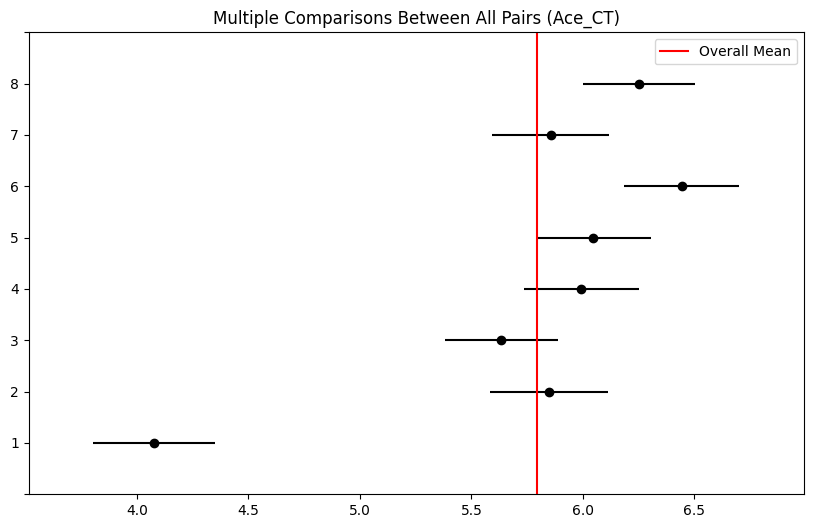

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   1.7697    0.0  1.2333  2.3062   True
     1      3   1.5551    0.0  1.0282  2.0819   True
     1      4    1.914    0.0  1.3825  2.4456   True
     1      5   1.9679    0.0  1.4364  2.4994   True
     1      6    2.364    0.0  1.8325  2.8956   True
     1      7   1.7777    0.0  1.2413  2.3142   True
     1      8   2.1736    0.0  1.6467  2.7005   True
     2      3  -0.2147 0.9067   -0.73  0.3007  False
     2      4   0.1443 0.9899 -0.3758  0.6644  False
     2      5   0.1982 0.9402  -0.322  0.7183  False
     2      6   0.5943 0.0131  0.0742  1.1144   True
     2      7    0.008    1.0 -0.5172  0.5332  False
     2      8   0.4039 0.2468 -0.1115  0.9192  False
     3      4    0.359 0.3834 -0.1512  0.8692  False
     3      5   0.4128 0.2106 -0.0974   0.923  False
     3      6    0.809 0.0001  0.2988  1.3192 

In [56]:
# Tukey Analysis
tukey = pairwise_tukeyhsd(endog=data['Ave_CT'], groups=data['Category'], alpha=0.05)

# Plot Tukey + mean vertical line
fig = tukey.plot_simultaneous()
overall_mean = data['Ave_CT'].mean()
plt.axvline(x=overall_mean, color='red', label='Overall Mean')
plt.title('Multiple Comparisons Between All Pairs (Ace_CT)')
plt.legend()
plt.show()

# Tukey results
print(tukey.summary())

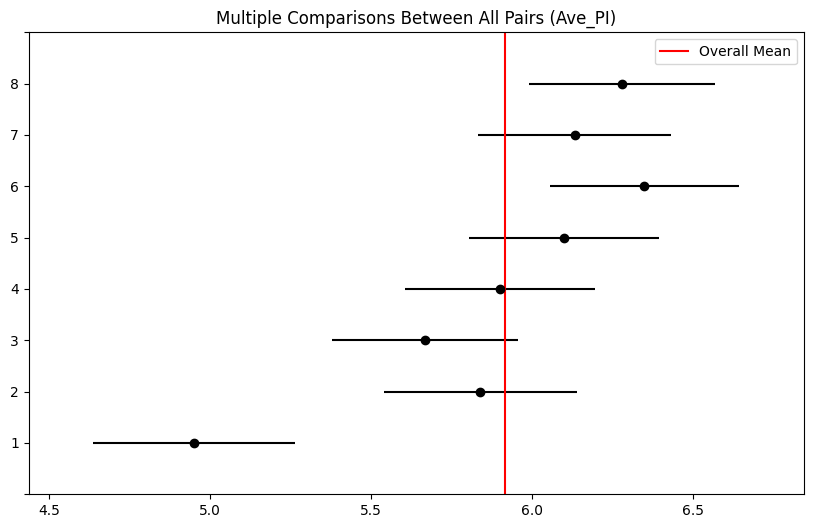

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.8907 0.0004  0.2778 1.5037   True
     1      3   0.7174 0.0079  0.1154 1.3194   True
     1      4   0.9514 0.0001  0.3441 1.5586   True
     1      5   1.1501    0.0  0.5428 1.7574   True
     1      6   1.4001    0.0  0.7928 2.0074   True
     1      7   1.1841    0.0  0.5711  1.797   True
     1      8   1.3316    0.0  0.7296 1.9336   True
     2      3  -0.1733 0.9856 -0.7622 0.4155  False
     2      4   0.0606    1.0 -0.5336 0.6549  False
     2      5   0.2594 0.8835 -0.3349 0.8536  False
     2      6   0.5094 0.1529 -0.0849 1.1036  False
     2      7   0.2933 0.8079 -0.3067 0.8934  False
     2      8   0.4409 0.3023  -0.148 1.0297  False
     3      4    0.234 0.9222  -0.349 0.8169  False
     3      5   0.4327 0.3132 -0.1502 1.0156  False
     3      6   0.6827 0.0098  0.0998 1.2656   True
     3      

In [57]:
# Tukey Analysis
tukey = pairwise_tukeyhsd(endog=data['Ave_PI'], groups=data['Category'], alpha=0.05)

# Plot Tukey + mean vertical line
fig = tukey.plot_simultaneous()
overall_mean = data['Ave_PI'].mean()
plt.axvline(x=overall_mean, color='red', label='Overall Mean')
plt.title('Multiple Comparisons Between All Pairs (Ave_PI)')
plt.legend()
plt.show()

# Tukey results
print(tukey.summary())

## Uji Multikolinearitas

In [58]:
# Independent variable
X = data[['AIGL', 'PT', 'FE', 'Ave_PA', 'Ave_CT']]

# Intercept
import statsmodels.api as sm
X_const = sm.add_constant(X)

# VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

print(vif_data)


  Variable        VIF
0    const  58.601716
1     AIGL   1.317732
2       PT   1.296187
3       FE   1.054246
4   Ave_PA   3.585667
5   Ave_CT   3.541220
